# M1.1 Actividad Distribuciones

Carlos Adrián Palmieri Álvarez - A01635776

Cynthia Cristal Quijas Flores - A01655996

## Problema 5

Para los 3 conjuntos de datos que se proveen en el CSV:

a.- Construye e interpreta un histograma. Utiliza la regla de Sturges para calcular el número apropiado de clases.

b.- Compara el número de clases con el obtenido con la regla de Scott.

c.- Construye e interpreta un gráfico Q-Q para comprobar si los datos provienen de una distribución normal. Estima los  parámetros utilizando la regresión de un gráfico probabilístico.

d.- Utilizando Minitab o algún otro software, ¿a qué distribución es más probable que pertenezca cada conjunto de datos y cuáles serían sus respectivos parámetros?

In [2]:
import pandas as pd

# Cargar el archivo CSV
archivo_csv = 'Actividad 1 Distribuciones.csv'
df = pd.read_csv('../data/raw/' + archivo_csv)

# Mostrar las primeras filas del DataFrame para verificar la carga
df.head()


,Datos1,Datos2,Datos3
0,11.385,12.444,2.141
1,108.389,12.740,4.937
2,18.080,11.569,0.341
3,6.296,12.464,0.231
4,24.399,11.908,1.085


## a) Histogramas

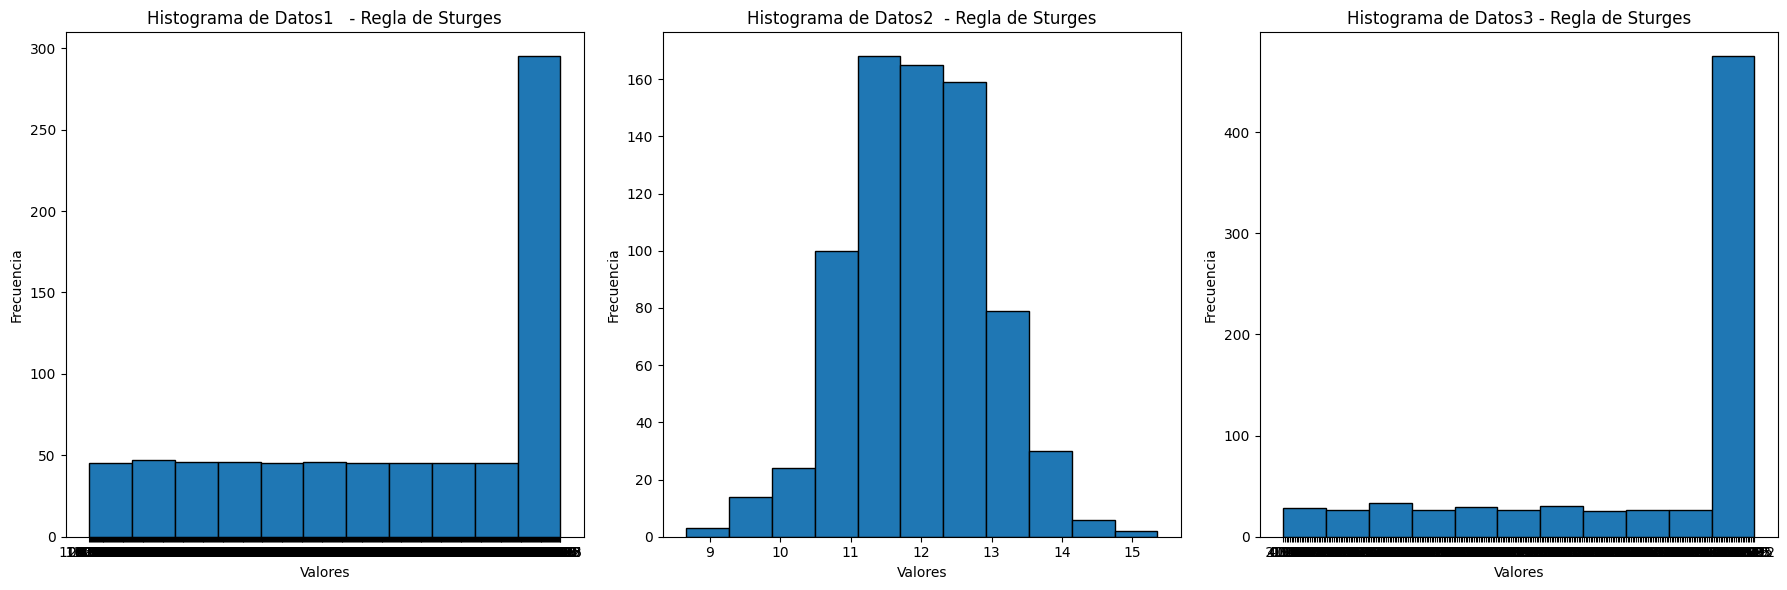

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular el número de clases utilizando la regla de Sturges
def sturges_rule(n):
    return int(np.ceil(np.log2(n) + 1))

# Crear una figura con 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 fila, 3 columnas

# Construcción de histogramas utilizando la regla de Sturges
for i, columna in enumerate(df.columns):
    datos = df[columna]
    n = len(datos)
    k = sturges_rule(n)
    
    axs[i].hist(datos, bins=k, edgecolor='black')
    axs[i].set_title(f'Histograma de {columna} - Regla de Sturges')
    axs[i].set_xlabel('Valores')
    axs[i].set_ylabel('Frecuencia')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


Observando el primer histograma, sugiere que la mayoría de los datos están concentrados en valores bajos, con algunas observaciones mucho más grandes que podrían ser atípicas o parte de un proceso diferente.  Tiene un sesgo a la derecha (sesgo positivo), con una alta concentración de valores bajos y una larga cola hacia valores más altos

En cuanto al segundo histograma, sgiere que los datos podrían seguir una distribución normal, lo que es coherente con la simetría y la concentración alrededor de la media. 

Por último, el tercer histograma, también está sesgado a la derecha, con la mayoría de los datos concentrados en valores bajos y una cola que se extiende hacia valores más altos. Esto indica una concentración de datos en valores bajos, y, al igual que en Datos1, la presencia de algunos valores más altos que podrían ser outliers o parte de una distribución que no se comporta como una normal.

## b) Calcular número de clases

In [ ]:
# Función para calcular el número de clases utilizando la regla de Scott
def scott_rule(datos):
    ancho_bin = 3.5 * np.std(datos) / (len(datos) ** (1/3))
    rango = np.max(datos) - np.min(datos)
    return int(np.ceil(rango / ancho_bin))

# Comparación entre Sturges y Scott
for columna in df.columns:
    datos = df[columna]
    n = len(datos)
    
    k_sturges = sturges_rule(n)
    k_scott = scott_rule(datos)
    
    print(f"Columna: {columna}")
    print(f"Número de clases (Sturges): {k_sturges}")
    print(f"Número de clases (Scott): {k_scott}\n")

Columna: Datos1
Número de clases (Sturges): 11
Número de clases (Scott): 21

Columna: Datos2
Número de clases (Sturges): 11
Número de clases (Scott): 18

Columna: Datos3
Número de clases (Sturges): 11
Número de clases (Scott): 16



## c) Gráficos QQ-Plot

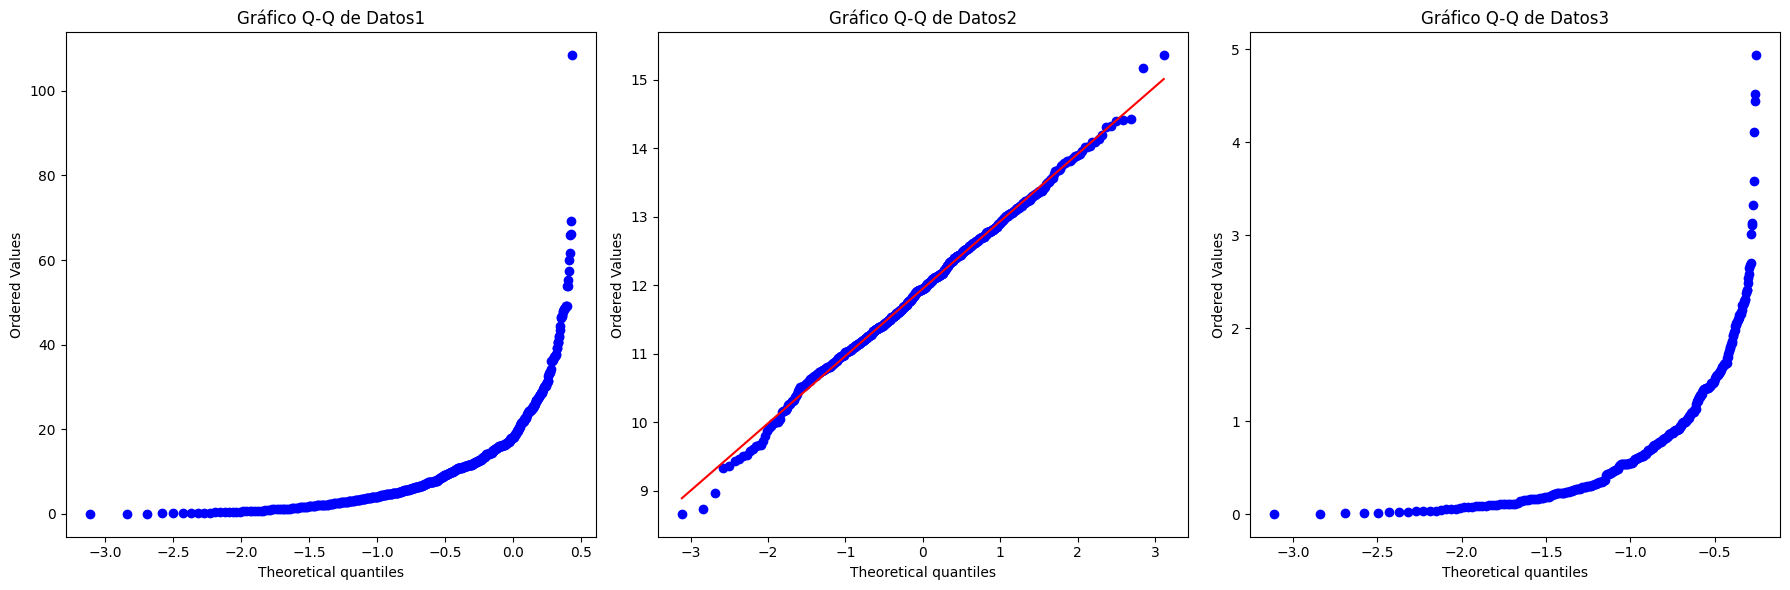

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Crear una figura con 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 fila, 3 columnas

# Construcción de gráficos Q-Q
for i, columna in enumerate(df.columns):
    datos = df[columna]
    
    stats.probplot(datos, dist="norm", plot=axs[i])
    axs[i].set_title(f'Gráfico Q-Q de {columna}')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


## d) Distribución más probable


A través del análisis de los gráficos QQ-Plot podemos obtener los siguientes insights:

1. **Datos1**: La curva muestra una desviación significativa de la línea recta, con colas en ambos extremos que se alejan considerablemente de la línea teórica. Esto sugiere que los datos tienen colas más pesadas que una distribución normal, posiblemente indicando una distribución con colas más largas, como una **distribución t de Student** con pocos grados de libertad.

2. **Datos2**: Los puntos se alinean bastante bien con la línea recta, aunque hay algunas ligeras desviaciones en las colas. Gracias a esto podemos interpretar que que los datos siguen una **distribución normal**, o están muy cerca de hacerlo. Las desviaciones en las colas podrían ser indicativas de ligeras desviaciones, pero debido a la poca precensia de puntos que se desprenden de la línea rojo, tenemos suficientes argumentos para suponer que se comporta normal.

3. **Datos3**: La curva se asemeja a la de Datos1, con una desviación notable de la línea recta, especialmente en las colas. De la misma manera que en Datos1, esto sugiere que los datos tienen colas pesadas. De modo que podemos suponer que no sigue una distribución normal este conjunto de datos.

# Problema 4

El artículo “Characterization of Room Temperature Damping in Aluminum-Idium Alloys” (Metallurgical Trans., 1993: 1611-1619) sugiere que el tamaño de grano de matriz A1 (μm) de una aleación compuesta de 2% de indio podría ser modelado con una distribución normal con valor medio de 96 y desviación estándar de 14. 

a.- ¿Cuál es la probabilidad de que el tamaño de grano exceda de 100?

b.- ¿Cuál es la probabilidad de que el tamaño de grano sea de 50 y 80?

c.- ¿Qué intervalo (a, b) incluye el 90% central de todos los tamaño s de grano (de modo que 5% esté
por debajo de a y 5% por encima de b)?


## a) 

In [ ]:
import scipy.stats as stats

# Parámetros de la distribución
mu = 96
sigma = 14

# Calcular la probabilidad P(X > 100)
p_a = 1 - stats.norm.cdf(100, mu, sigma)
# p_a

# # Imprimir el resultado
# print(f"La probabilidad de que el tamaño del grano exceda 100 es de {p_a:.4f}")

# Multiplicar p_a por 100
p_a_percent = p_a * 100

# Imprimir el resultado
print(f"La probabilidad de que el tamaño del grano exceda 100 es de {p_a_percent:.2f}%")


La probabilidad de que el tamaño del grano exceda 100 es de 38.75%


## b) 

In [ ]:
# Calcular la probabilidad P(50 < X < 80)
p_b = stats.norm.cdf(80, mu, sigma) - stats.norm.cdf(50, mu, sigma)
# p_b

# Multiplicar p_b

#por 100
p_b_percent = p_b * 100

# Imprimir el resultado
print(f"la probabilidad de que el tamaño de grano sea de 50 y 80 es {p_b_percent:.2f}%")


la probabilidad de que el tamaño de grano sea de 50 y 80 es 12.60%


## c) 

In [ ]:
# Calcular los percentiles
a = stats.norm.ppf(0.05, mu, sigma)
b = stats.norm.ppf(0.95, mu, sigma)
a, b

(72.97204922267937, 119.02795077732061)

El intervalo pasado es el que incluirá el 90% central de todos los tamaño s de grano (de modo que 5% esté por debajo de a y 5% por encima de b.

## Problema 3

El artículo “Computer Assisted Net Weight Control” (Quality Progress, 1983: 22-25) sugiere una distribución normal con media de 137.2 oz y una desviación estándar de 1.6 oz del contenido real de frascos de cierto tipo. El contenido declarado fue de 135 oz.

a.- ¿Cuál es la probabilidad de que un solo frasco contenga más que el contenido declarado?

b.- Suponiendo que la media permanece en 137.2, ¿a qué valor se tendría que cambiar la desviación estándar de modo que 95% de todos los frascos contengan más que el contenido declarado?

c.- Entre 10 frascos seleccionados al azar, ¿cuál es la probabilidad de que por lo menos ocho contengan más que el contenido declarado?

## a)

In [ ]:
import scipy.stats as stats

# Parámetros de la distribución
mu = 137.2
sigma = 1.6

# Calcular la probabilidad P(X > 135)
p_a = 1 - stats.norm.cdf(135, mu, sigma)
# p_a

# Multiplicar p_a por 100
p_a_percent = p_a * 100

# Imprimir el resultado
print(f"la probabilidad de que un solo frasco contenga más que el contenido declarado es de {p_a_percent:.2f}%")

la probabilidad de que un solo frasco contenga más que el contenido declarado es de 91.54%


## b)

In [ ]:
# Calcular la nueva desviación estándar
z_value = stats.norm.ppf(0.05)
sigma_new = (135 - mu) / z_value
sigma_new

print(f"suponiendo que la media permanece en 137.2, el nuevo valor de la desviación estándar sería de {sigma_new} para que el 95% de todos los frascos contengan más que el contenido declarado")

suponiendo que la media permanece en 137.2, el nuevo valor de la desviación estándar sería de 1.3375050302058846 para que el 95% de todos los frascos contengan más que el contenido declarado


## c)

In [ ]:
from scipy.stats import binom

# Parámetros
n = 10  # número de frascos
p = p_a  # probabilidad de que un frasco contenga más de 135 oz

# Calcular la probabilidad P(Y >= 8)
p_c = binom.cdf(7, n, p)
p_c = 1 - p_c
# p_c

# Multiplicar p_c por 100
p_c_percent = p_c * 100

# Imprimir el resultado
print(f"la probabilidad de que por lo menos ocho contengan más que el contenido declarado es de {p_c_percent:.2f}%")


la probabilidad de que por lo menos ocho contengan más que el contenido declarado es de 95.38%


# Problema 1

Una barra de 12 pulg que está sujeta por ambos extremos se somete a una cantidad creciente de esfuerzo hasta que se rompe. Sea Y = la distancia del extremo izquierdo al punto donde ocurre la ruptura. Suponga que Y tiene la función de densidad de probabilidad: 

a.- La función de distribución acumulativa de Y.

b.- P(Y ≤ 4), P(Y > 6) y P(4 ≤ Y ≤ 6)

c.- E(Y), E(Y2) y Var(Y).

d.- La probabilidad de que el punto de ruptura ocurra a más de 2 pulg del punto de ruptura esperado.

## a)

In [ ]:
# pip install sympy

In [ ]:
# Función de acumulación de probabilidad dada una función de densidad

import numpy as np
import matplotlib.pyplot as plt
from sympy import integrate, init_printing
from sympy.abc import x
init_printing(use_latex="mathjax")

In [ ]:
f = (1/24) * x * (1-x/12)

#Corroborando que la funcion de densidad sea valida
F = round(integrate(f, (x, 0, 12)))
if F != 1:
    print("La función de densidad no es válida, F:", F)
else:
    print("La función de densidad es válida, F: ", F)

#Calculando la función de acumulación de probabilidad
Fa = integrate(f, (x, 0, x))

print("La funcion de acumulacion de probabilidad es:", Fa)

La función de densidad es válida, F:  1
La funcion de acumulacion de probabilidad es: -0.00115740740740741*x**3 + 0.0208333333333333*x**2


## b)

In [ ]:
# Función de densidad acumulada de 0 a 4
Fb1 = integrate(f, (x, 0, 4))
print("Función de densidad acumulada de 0 a 4 es:", Fb1, "pulgadas. \nEsta es la probabilidad que la barra se rompa entre los 0 a 4 pulgadas")

# Función de densidad acumulada de 0 a 6
Fb2 = integrate(f, (x, 0, 6))
print("\nFunción de densidad acumulada de 0 a 6 es:", Fb2, "pulgadas. \nEsta es la probabilidad que la barra se rompa entre los 0 a 6 pulgadas")

# Función de densidad acumulada de 4 a 6
Fb3 = integrate(f, (x, 4, 6))
print("\nFunción de densidad acumulada de 4 a 6 es:", Fb3, "pulgadas. \nEsta es la probabilidad que la barra se rompa entre los 4 a 6 pulgadas")

Función de densidad acumulada de 0 a 4 es: 0.259259259259259 pulgadas. 
Esta es la probabilidad que la barra se rompa entre los 0 a 4 pulgadas

Función de densidad acumulada de 0 a 6 es: 0.500000000000000 pulgadas. 
Esta es la probabilidad que la barra se rompa entre los 0 a 6 pulgadas

Función de densidad acumulada de 4 a 6 es: 0.240740740740741 pulgadas. 
Esta es la probabilidad que la barra se rompa entre los 4 a 6 pulgadas


## c) 

In [ ]:
# Calculando valor esperado E(X), E(X^2) y Var(X)
Ex = integrate(x*f, (x, 0, 12))
print("El valor esperado E(X) es:", Ex, "pulgadas. ")


Ex2 = integrate(x**2*f, (x, 0, 12))
print("El valor esperado E(X^2) es:", Ex2)

VarX = Ex2 - Ex**2
print("La varianza Var(X) es:", VarX)

El valor esperado E(X) es: 6.00000000000000 pulgadas. 
El valor esperado E(X^2) es: 43.2000000000000
La varianza Var(X) es: 7.20000000000002


## d)

In [ ]:
# Calculando el valor esperado
E = integrate(x*f, (x, 0, 12))
print("\nEl valor esperado es:", E, "pulgadas. \nEs decir que la barra se romperá en promedio a 6 pulgadas o la mayor parte de las veces")

# Probabilidad de de E + 2 
P = integrate(f, (x, E+2, 12))
print(f"\nLa probabilidad de que se rompa a 2 pulgadas después del valor esperado es:", P, "pulgadas. \nEs decir que la probabilidad de que la barra se rompa desde los 8 pulgadas hasta los 12 pulgadas es de:", P*100, "%")


El valor esperado es: 6.00000000000000 pulgadas. 
Es decir que la barra se romperá en promedio a 6 pulgadas o la mayor parte de las veces

La probabilidad de que se rompa a 2 pulgadas después del valor esperado es: 0.259259259259259 pulgadas. 
Es decir que la probabilidad de que la barra se rompa desde los 8 pulgadas hasta los 12 pulgadas es de: 25.9259259259259 %


# Problema 2

Sea X la temperatura, en grados centígrados, a la cual ocurre una reacción química.  Suponga que X tiene una función de densidad de probabilidad:

a.- Corrobore que la función es una distribución válida.

b.- Determine la función de distribución acumulativa.

c.- E(Y), E(Y2) y Var(Y).

d.- La probabilidad de que la temperatura sea menor a 0°C.

e.- La probabilidad de que la temperatura sea entre 4°C y 6°C.

## a) 

In [ ]:
f2 = 1/9 * (4-x**2)
liminf = -1
limsup = 2

F2 = round(integrate(f2, (x, liminf, limsup)))
if F2 != 1:
    print("La función de densidad no es válida, F:", F2)
else:
    print("La función de densidad es válida, con límite inferior de:", liminf, "y límite superior de:", limsup, "F: ", F2)

La función de densidad es válida, con límite inferior de: -1 y límite superior de: 2 F:  1


## b) 

In [ ]:
# determinando la funcion de distribucion acumulativa de -1 a 2
F3 = integrate(f2, (x, -1, x))
print("La función de densidad acumulada de -1 a x es:", F3)

La función de densidad acumulada de -1 a x es: -0.037037037037037*x**3 + 0.444444444444444*x + 0.407407407407407


## c)

In [ ]:
#Calculando el valor esperado E(X), E(X^2) y Var(X)
Ex = integrate(x*f2, (x, liminf, limsup))
print("El valor esperado E(X) es:", Ex)

Ex2 = integrate(x**2*f2, (x, liminf, limsup))
print("El valor esperado E(X^2) es:", Ex2)

VarX = Ex2 - Ex**2
print("La varianza Var(X) es:", VarX)

El valor esperado E(X) es: 0.250000000000000
El valor esperado E(X^2) es: 0.600000000000000
La varianza Var(X) es: 0.537500000000000


## d)

In [ ]:
# Calculando la probabilidad de liminf a 0
P = integrate(f2, (x, liminf, 0))
print("La probabilidad de que la reacción química se haga desde", liminf, "hasta 0 es:", P, "\nEs decir que la probabilidad de que la reacción química se haga desde -1 hasta 0 es de:", round(P*100,2), "%")

La probabilidad de que la reacción química se haga desde -1 hasta 0 es: 0.407407407407407 
Es decir que la probabilidad de que la reacción química se haga desde -1 hasta 0 es de: 40.74 %


## e)

In [ ]:
#Calculando la probabilidad de 4 a 6
P2 = integrate(f2, (x, 4, 6))
print("La probabilidad de que sea a partir de 4 hasta 6 es:", P2)
print(""" 

Ya que los límites están dados entre -1 y 2; la probabilidad que la temperatura sea de 4 a 6 es inexistente, ya que la función de densidad de probabilidad no se encuentra en ese rango.
Por eso, al calcular la probabilidad de que sea a partir de 4 hasta 6, el resultado es negativo y no entre 0 y 1.

""")

La probabilidad de que sea a partir de 4 hasta 6 es: -4.74074074074074
 

Ya que los límites están dados entre -1 y 2; la probabilidad que la temperatura sea de 4 a 6 es inexistente, ya que la función de densidad de probabilidad no se encuentra en ese rango.
Por eso, al calcular la probabilidad de que sea a partir de 4 hasta 6, el resultado es negativo y no entre 0 y 1.




In [5]:
#Exportando el notebook a un pdf en la ruta "../reports/M1.1 Actividad 1 Distribuciones.pdf"
import subprocess
import os

# Define el nombre del notebook y el directorio de salida
notebook_filename = 'M1.1_Actividad_1_Distribuciones.ipynb'
output_directory = '../reports/PDF'

# Crea el directorio si no existe
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Construye el comando
command = [
    'jupyter', 'nbconvert',
    '--to', 'pdf',
    notebook_filename,
    '--output-dir', output_directory
]

try:
    # Ejecuta el comando
    result = subprocess.run(command, capture_output=True, text=True)
    print('Salida estándar:')
    print(result.stdout)
    print('Salida de error:')
    print(result.stderr)
except subprocess.CalledProcessError as e:
    print(f'Error al ejecutar el comando: {e}')
    print(f'Código de salida: {e.returncode}')


Salida estándar:
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent